In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("inventory_dataset.csv")

In [3]:
df

,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
0,P0001,Doodad,Clothing,Supplier D,339.75,NaN,588.0,292.0,161.0,1
1,P0002,Doohickey,Clothing,Supplier C,NaN,470.14,348.0,114.0,70.0,1
2,P0003,Thingamajig,Clothing,Supplier B,NaN,460.10,146.0,199.0,163.0,1
3,P0004,Doohickey,Clothing,Supplier A,NaN,NaN,66.0,13.0,145.0,0
4,P0005,Doohickey,Toys,Supplier E,228.75,66.71,903.0,271.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...
995,P0996,Gadget,Electronics,Supplier D,350.37,122.91,186.0,82.0,14.0,0
996,P0997,Widget,Toys,Supplier E,117.17,133.34,497.0,428.0,35.0,0
997,P0998,Widget,Electronics,Supplier C,301.70,241.22,441.0,72.0,62.0,0
998,P0999,Doodad,Toys,Supplier B,139.67,44.92,129.0,310.0,68.0,0


In [4]:
df.isnull().sum()

Product_ID             0
Product_Name           0
Category               0
Supplier               0
Purchase_Price       269
Sale_Price           259
Quantity_In_Stock     82
Reorder_Level         86
Units_On_Order       102
Discontinued           0
dtype: int64

In [5]:
df["Purchase_Price"]=df["Purchase_Price"].fillna(df["Purchase_Price"].median())

In [6]:
df["Sale_Price"]=df["Sale_Price"].fillna(df["Sale_Price"].mean())

In [7]:
df.isnull().sum()

Product_ID             0
Product_Name           0
Category               0
Supplier               0
Purchase_Price         0
Sale_Price             0
Quantity_In_Stock     82
Reorder_Level         86
Units_On_Order       102
Discontinued           0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Product_ID           0
Product_Name         0
Category             0
Supplier             0
Purchase_Price       0
Sale_Price           0
Quantity_In_Stock    0
Reorder_Level        0
Units_On_Order       0
Discontinued         0
dtype: int64

In [10]:
y=df["Sale_Price"]

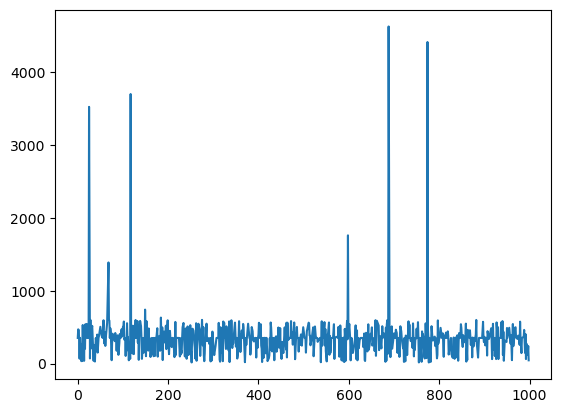

In [11]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

In [12]:
q1=df["Sale_Price"].quantile(0.25)
q3=df["Sale_Price"].quantile(0.75)
print(q1)
print(q3)

220.2875
408.7125


In [13]:
iqr=q3-q1
print(iqr)
lb=q1-(1.5*iqr)
ub=q3+1.5*iqr
print(lb)
print(ub)

188.42499999999998
-62.349999999999994
691.3499999999999


In [14]:
import numpy as np
x_sale=np.reshape(df["Sale_Price"],-1)
print(x_sale)

[ 351.92688259  470.14        460.1         351.92688259   66.71
  351.92688259  230.48        267.92         33.22        166.85
   34.7         529.32        157.39        341.04         37.8
  405.11        203.97        540.28        351.92688259  542.06
  351.92688259  509.25        351.92688259 3523.7          70.53
  599.35        206.08        452.69        516.94        351.92688259
   38.61        255.55         91.1          28.12        225.85
  351.92688259  197.98        397.79        150.73        351.92688259
  379.89        504.71        380.4         351.92688259  594.55
  351.92688259  273.74        428.83        242.7         351.92688259
  558.55       1388.1         597.44        588.95        351.92688259
  485.58        433.33         46.21        281.04        409.75
  351.92688259  351.92688259  307.71        419.17        351.92688259
  351.92688259  176.04        351.92688259  387.03        119.92
  281.28        405.64        351.92688259  351.92688259  470

In [15]:
outlier=((x_sale<lb)|(x_sale>ub))

In [16]:
outlier

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [17]:
cleaned=df[~outlier]

In [18]:
cleaned

,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
0,P0001,Doodad,Clothing,Supplier D,339.75,351.926883,588.0,292.0,161.0,1
1,P0002,Doohickey,Clothing,Supplier C,253.17,470.140000,348.0,114.0,70.0,1
2,P0003,Thingamajig,Clothing,Supplier B,253.17,460.100000,146.0,199.0,163.0,1
3,P0004,Doohickey,Clothing,Supplier A,253.17,351.926883,66.0,13.0,145.0,0
4,P0005,Doohickey,Toys,Supplier E,228.75,66.710000,903.0,271.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...
993,P0994,Gadget,Clothing,Supplier A,253.17,273.470000,831.0,433.0,76.0,0
995,P0996,Gadget,Electronics,Supplier D,350.37,122.910000,186.0,82.0,14.0,0
996,P0997,Widget,Toys,Supplier E,117.17,133.340000,497.0,428.0,35.0,0
997,P0998,Widget,Electronics,Supplier C,301.70,241.220000,441.0,72.0,62.0,0


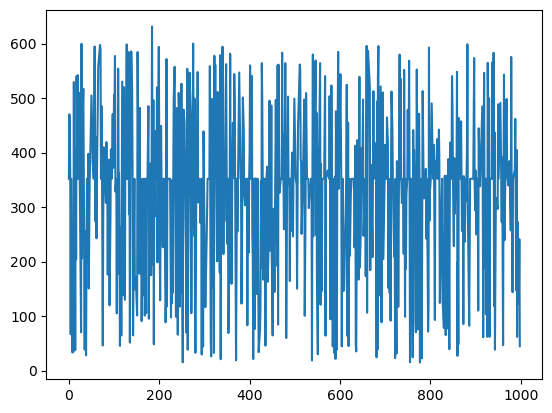

In [19]:
x=cleaned["Sale_Price"]
plt.plot(x)
plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cleaned["Sale_Price"]=scaler.fit_transform(cleaned[["Sale_Price"]])

C:\Users\HDC0422093\AppData\Local\Temp\ipykernel_12568\2750065002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["Sale_Price"]=scaler.fit_transform(cleaned[["Sale_Price"]])


In [29]:
print(cleaned["Sale_Price"])

0      0.546678
1      0.738495
2      0.722204
3      0.546678
4      0.083874
         ...   
993    0.419371
995    0.175067
996    0.191991
997    0.367041
998    0.048517
Name: Sale_Price, Length: 743, dtype: float64


In [33]:
def toint(x):
   return float(x)

cleaned["Sale_Price"]=cleaned["Sale_Price"].apply(toint)

C:\Users\HDC0422093\AppData\Local\Temp\ipykernel_12568\879099252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["Sale_Price"]=cleaned["Sale_Price"].apply(toint)


In [34]:
print(cleaned["Sale_Price"])

0      0.546678
1      0.738495
2      0.722204
3      0.546678
4      0.083874
         ...   
993    0.419371
995    0.175067
996    0.191991
997    0.367041
998    0.048517
Name: Sale_Price, Length: 743, dtype: float64


In [ ]:
# one hot encoding is not required